In [ ]:
# Importing the required libraries
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# loading the data and getting insights
data = pd.read_csv('/content/UNSW_NB15 (1).csv')
#print(data.head(n=5))
print(data.info())
data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
# Cleaning the data
# Service column has a lot of '-' as this cannot be processed by the model replacing with NAN values
data[data['service']=='-']
data['service'].replace('-', np.nan, inplace=True)
data.isnull().sum()


id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [ ]:
# Visualizing the shape of the data
data.shape
data.dropna(inplace=True)
data.shape

(81173, 45)

In [ ]:
# Reading the features.csv file
features = pd.read_csv('/content/UNSW_NB15_features.csv')
features.head()


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
# Finding the feature names for all the feature types
features['Type '] = features['Type '].str.lower()
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']



In [ ]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_cols = cols.intersection(nominal_names)
integer_cols = cols.intersection(integer_names)
binary_cols = cols.intersection(binary_names)
float_cols = cols.intersection(float_names)

In [ ]:
binary_cols

Index(['is_ftp_login', 'is_sm_ips_ports'], dtype='object')

In [ ]:
# Converting the binary coulumns to integer
# Converting integer columns to numeric
for c in integer_cols:
  pd.to_numeric(data[c])
# Converting binary columns to numeric
for c in binary_cols:
  pd.to_numeric(data[c])
# Converting float columns to numeric
for c in float_cols:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

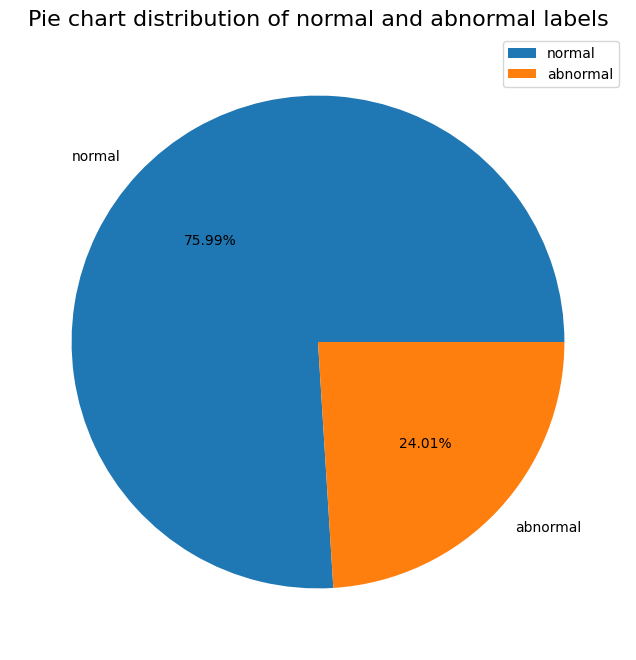

In [ ]:
#binary classification
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

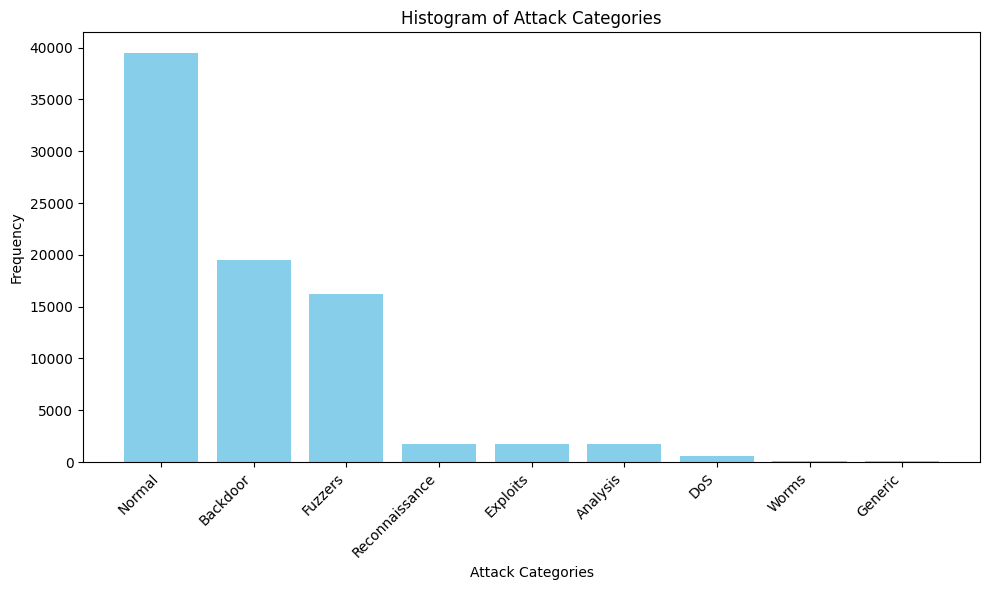

In [ ]:
import matplotlib.pyplot as plt
counts = data.attack_cat.value_counts()
categories = data.attack_cat.unique()
# Plotting histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')

# Adding labels and title
plt.xlabel('Attack Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Attack Categories')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
numerical_col = data.select_dtypes(include='number').columns
# Numerical columns have are those columns that are float or numeric
#One hot encoding
# selecting categorical data attributes
categorical_col = data.columns.difference(numerical_col)
cat_col = categorical_col[1:]
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)
data_cat


,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
175336,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
175338,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
175339,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:

data = pd.concat([data, data_cat],axis=1)
data.drop(columns=cat_col,inplace=True)
print(data.shape)



(81173, 61)


In [ ]:
#Data Normalization
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)


['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df
# data before normalization
print(data.head())

    id       dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
3    4  1.681642     12     12     628     770      13.677108    62   252   
11  12  2.093085     62     28   56329    2212      42.520967    62   252   
15  16  0.000002      2      0     138       0  500000.001300   254     0   
17  18  0.393556     10      8     860    1096      43.195886    62   252   
21  22  0.338017     10      6     998     268      44.376468   254   252   

           sload  ...  service_radius  service_smtp  service_snmp  \
3   2.740179e+03  ...           False         False         False   
11  2.118251e+05  ...           False          True         False   
15  2.760000e+08  ...           False         False          True   
17  1.573347e+04  ...           False         False         False   
21  2.127704e+04  ...           False         False         False   

    service_ssh  service_ssl  state_CON  state_FIN  state_INT  state_REQ  \
3         False        False      False       

In [ ]:
data = normalization(data.copy(),numerical_col)
# data after normalization
print(data.head())

          id           dur     spkts     dpkts    sbytes    dbytes      rate  \
3   0.000000  2.802780e-02  0.001144  0.001093  0.000041  0.000053  0.000014   
11  0.000046  3.488529e-02  0.006344  0.002551  0.004337  0.000151  0.000043   
15  0.000068  1.666693e-08  0.000104  0.000000  0.000003  0.000000  0.500000   
17  0.000080  6.559354e-03  0.000936  0.000729  0.000059  0.000075  0.000043   
21  0.000103  5.633690e-03  0.000936  0.000547  0.000069  0.000018  0.000044   

        sttl      dttl     sload  ...  service_radius  service_smtp  \
3   0.138393  0.992126  0.000001  ...           False         False   
11  0.138393  0.992126  0.000092  ...           False          True   
15  0.995536  0.000000  0.119792  ...           False         False   
17  0.138393  0.992126  0.000007  ...           False         False   
21  0.995536  0.992126  0.000009  ...           False         False   

    service_snmp  service_ssh  service_ssl  state_CON  state_FIN  state_INT  \
3          Fa

In [ ]:
#Label encoding
#Binary Labels
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x: 'normal' if x == 0 else 'abnormal'))

In [ ]:
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

In [ ]:
#Multi-class Labels
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

multi_data = pd.get_dummies(multi_data, columns=['attack_cat'])

# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

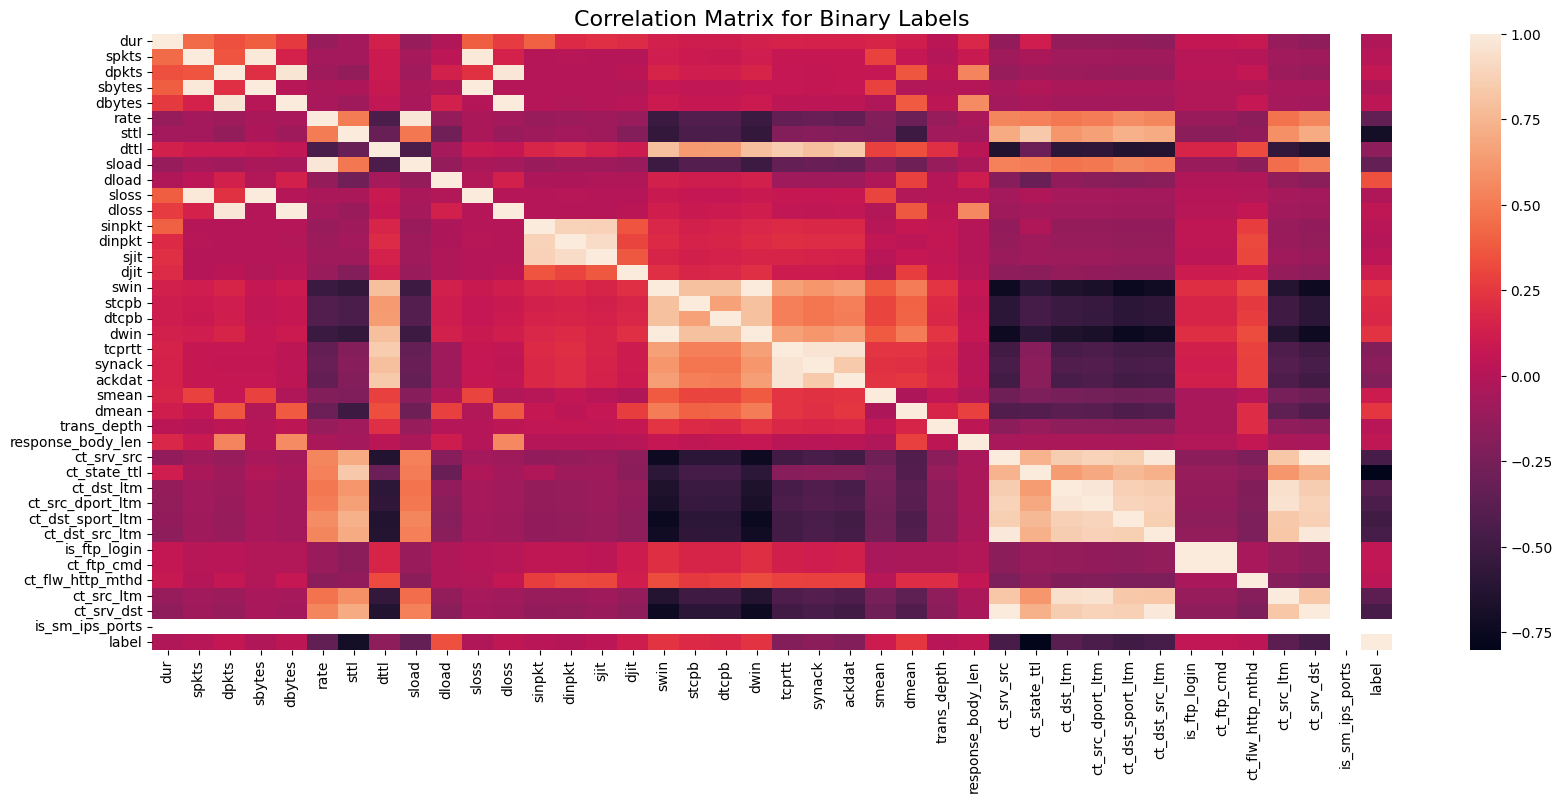

In [ ]:
#Correlation between features of dataset
num_col.append('label')
#Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

In [ ]:
num_col = list(multi_data.select_dtypes(include='number').columns)

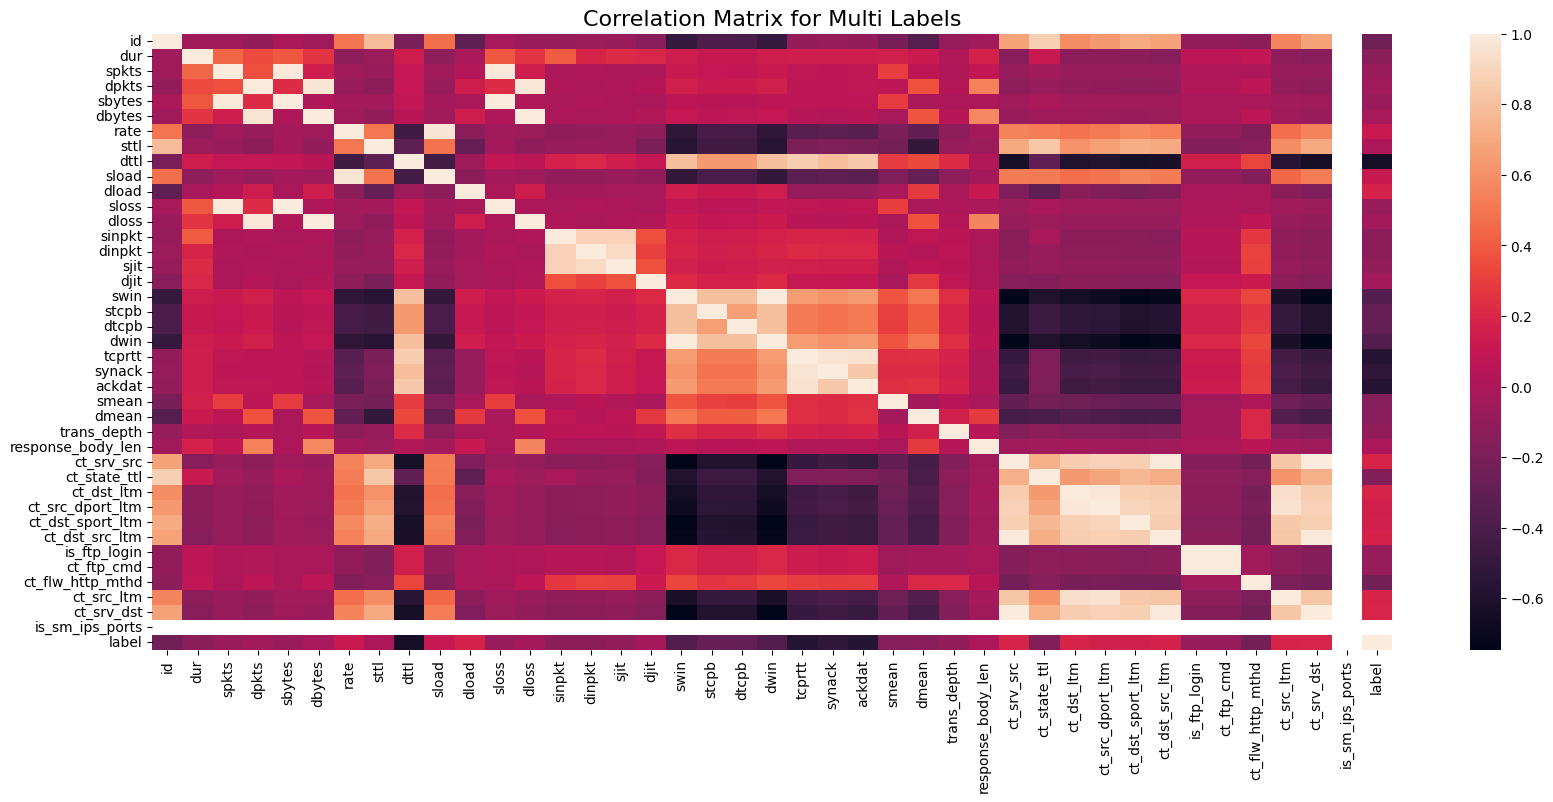

In [ ]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20, 8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi, vmax=1.0, annot=False)
plt.title('Correlation Matrix for Multi Labels', fontsize=16)
plt.show()


In [ ]:
#Feature Selection
#Binary Labels
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
print(highest_corr_bin.sort_values(ascending=True))

sload               0.334562
dload               0.343910
rate                0.344535
ct_src_ltm          0.368486
ct_dst_ltm          0.387358
ct_src_dport_ltm    0.444874
ct_srv_dst          0.459984
ct_srv_src          0.463153
ct_dst_src_ltm      0.463735
ct_dst_sport_ltm    0.497234
sttl                0.707337
ct_state_ttl        0.801403
label               1.000000
Name: label, dtype: float64


In [ ]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()

In [ ]:
#Saving Prepared Dataset to Disk
bin_data.to_csv('bin_data.csv')

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
print(highest_corr_multi.sort_values(ascending=True))
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

swin      0.364393
dwin      0.364393
synack    0.524027
ackdat    0.570098
tcprtt    0.570205
dttl      0.646589
label     1.000000
Name: label, dtype: float64


In [ ]:
#Saving Prepared Dataset to Disk
multi_data.to_csv('multi_data.csv')

In [ ]:
#BINARY CLASSIFICATION
#Data Splitting
X = bin_data.drop(columns=['label'], axis=1)
Y = bin_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

In [ ]:
#Logistic Regression
logr_bin = LogisticRegression(random_state=123, max_iter=5000)
logr_bin.fit(X_train,y_train)
y_pred = logr_bin.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9784416384354789


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9785032337542346


In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)


Mean Absolute Error -  0.021496766245765322
Mean Squared Error -  0.021496766245765322
Root Mean Squared Error -  0.1466177555610688
R2 Score -  88.45167193436498
Accuracy -  97.85032337542347
              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       1.00      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12311    15]
 [  334  3575]]


In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7454265475823837


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9829996920234062


In [ ]:
#MULTI-CLASS CLASSIFICATION
#Data Splitting
X = multi_data.drop(columns=['label'], axis=1)
Y = multi_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

In [ ]:
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)
y_pred = rf_multi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.890645532194481


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Train the classifier
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8973800919842313


In [ ]:
#Decision Tree Classifier
dt_multi = DecisionTreeClassifier(random_state=123)
dt_multi.fit(X_train,y_train)
y_pred = dt_multi.predict(X_test)


In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

cls_report= classification_report(y_test, y_pred,target_names=le2.classes_)
print(cls_report)

Mean Absolute Error -  0.351757555847569
Mean Squared Error -  1.1263961892247043
Root Mean Squared Error -  1.0613181376122356
R2 Score -  24.146425123958238
Accuracy -  85.45499342969777
                precision    recall  f1-score   support

      Analysis       0.38      0.45      0.41       166
      Backdoor       0.05      0.03      0.04        32
           DoS       0.09      0.09      0.09       521
      Exploits       0.72      0.71      0.71      4900
       Fuzzers       0.12      0.10      0.11       508
       Generic       0.98      0.99      0.98     11839
        Normal       0.93      0.92      0.92      5855
Reconnaissance       0.08      0.08      0.08       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.85     24352
     macro avg       0.37      0.37      0.37     24352
  weighted avg       0.85      0.85      0.85     24352

